<a href="https://colab.research.google.com/github/anatasyatata/Portofolio/blob/main/EDA_Stunting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Untuk memberi tampilan yang menarik
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    GREYBACKBLACK =  '\033[0;30;47m'
    END = '\033[0m'

In [ ]:
# Loading Data:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/anatasyatata/Stunting/main/Data_Stunting.csv")

In [ ]:
data

,Provinsi,Kab/Kota,Prevalensi Balita Stunting (%),Kategori Prevalensi Stunting Berdasarkan WHO,Jumlah Penduduk (jiwa),Tingkat Kemiskinan (%),Proporsi Keluarga yang Memiliki Akses Terhadap Fasilitas Sanitasi yang Layak (%),Persentase Sarana Air Minum Memenuhi Syarat (%),Proporsi Desa/Kelurahan Stop BAB Sembarangan (%),Jumlah Rumah Sakit,Jumlah Puskesmas,Jumlah Posyandu,Jumlah Dokter,Jumlah Bidan,Jumlah Perawat
0,ACEH,Kabupaten Aceh Barat,27.4,Medium,215294,18.8,83.0,92.6,34.3,4,13,166,162,574,526
1,ACEH,Kabupaten Aceh Barat Daya,33.2,High,155966,16.3,62.3,76.3,3.2,1,13,103,113,417,380
2,ACEH,Kabupaten Aceh Besar,32.4,High,436212,14.1,86.4,89.6,11.0,2,28,561,214,799,374
3,ACEH,Kabupaten Aceh Jaya,33.7,High,97338,13.2,94.8,39.9,29.1,1,12,165,99,370,313
4,ACEH,Kabupaten Aceh Selatan,27.3,Medium,248511,13.2,64.7,75.0,5.4,1,24,0,175,552,782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,SULTENG,Kabupaten Sigi,31.1,High,242023,13.1,80.7,28.8,37.3,1,19,146,75,416,354
314,SULTENG,Kabupaten Tojo Una-Una,22.9,Medium,156163,16.6,68.9,72.1,8.9,3,16,45,60,383,592
315,SULTENG,Kabupaten Toli-Toli,21.1,Medium,238818,13.5,80.9,80.3,13.6,2,15,128,78,341,676
316,SULTENG,Kota Palu,18.0,Low,400001,7.2,61.7,100.0,43.5,13,14,114,596,685,1899


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 15 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Provinsi                                                                          318 non-null    object 
 1   Kab/Kota                                                                          318 non-null    object 
 2   Prevalensi Balita Stunting (%)                                                    318 non-null    float64
 3   Kategori Prevalensi Stunting Berdasarkan WHO                                      318 non-null    object 
 4   Jumlah Penduduk (jiwa)                                                            318 non-null    int64  
 5   Tingkat Kemiskinan (%)                                                            318 non-null    float64
 6   Pr

In [ ]:
#memeriksa apakah terdapat missing value & duplicate data
print(color.BOLD+"Memeriksa Missing Value"+color.END)
print("Apakah terdapat data yang hilang?",data.isnull().values.any())
print("\nBerikut keterangan jumlah data yang hilang:")
print(data.isnull().sum())
print("\nApakah terdapat data duplikat?",data.duplicated().any())

Memeriksa Missing Value
Apakah terdapat data yang hilang? False

Berikut keterangan jumlah data yang hilang:
Provinsi                                                                            0
Kab/Kota                                                                            0
Prevalensi Balita Stunting (%)                                                      0
Kategori Prevalensi Stunting Berdasarkan WHO                                        0
Jumlah Penduduk (jiwa)                                                              0
Tingkat Kemiskinan (%)                                                              0
Proporsi Keluarga yang Memiliki Akses Terhadap Fasilitas Sanitasi yang Layak (%)    0
Persentase Sarana Air Minum Memenuhi Syarat (%)                                     0
Proporsi Desa/Kelurahan Stop BAB Sembarangan (%)                                    0
Jumlah Rumah Sakit                                                                  0
Jumlah Puskesmas               

In [ ]:
#mencari lokasi data duplikasi
data[data.duplicated()]

,Provinsi,Kab/Kota,Prevalensi Balita Stunting (%),Kategori Prevalensi Stunting Berdasarkan WHO,Jumlah Penduduk (jiwa),Tingkat Kemiskinan (%),Proporsi Keluarga yang Memiliki Akses Terhadap Fasilitas Sanitasi yang Layak (%),Persentase Sarana Air Minum Memenuhi Syarat (%),Proporsi Desa/Kelurahan Stop BAB Sembarangan (%),Jumlah Rumah Sakit,Jumlah Puskesmas,Jumlah Posyandu,Jumlah Dokter,Jumlah Bidan,Jumlah Perawat


In [ ]:
dataset_num = data_raw4[['annual_inc', 'acc_now_delinq', 'delinq_2yrs', 'delinq_amnt', 'dti','inq_last_6mths',
                 'loan_amnt', 'open_acc', 'pub_rec','pub_rec_bankruptcies', 'revol_util', 'tax_liens',
                 'total_acc','loan_status']]

# Periksa Outliner


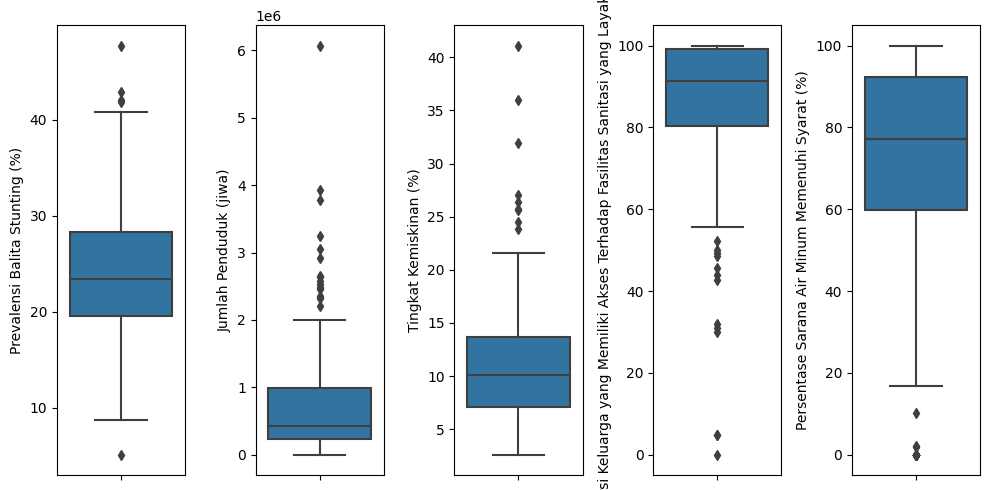

In [ ]:
#mendeteksi outliers
data_outliers = ['Prevalensi Balita Stunting (%)', 'Jumlah Penduduk (jiwa)', 'Tingkat Kemiskinan (%)',
                 'Proporsi Keluarga yang Memiliki Akses Terhadap Fasilitas Sanitasi yang Layak (%)', 'Persentase Sarana Air Minum Memenuhi Syarat (%)']
plt.figure(figsize=(10,5))
for i in range(0,len(data_outliers)):
    plt.subplot(1,len(data_outliers),i+1)
    sns.boxplot(y=data[data_outliers[i]])
    plt.tight_layout()

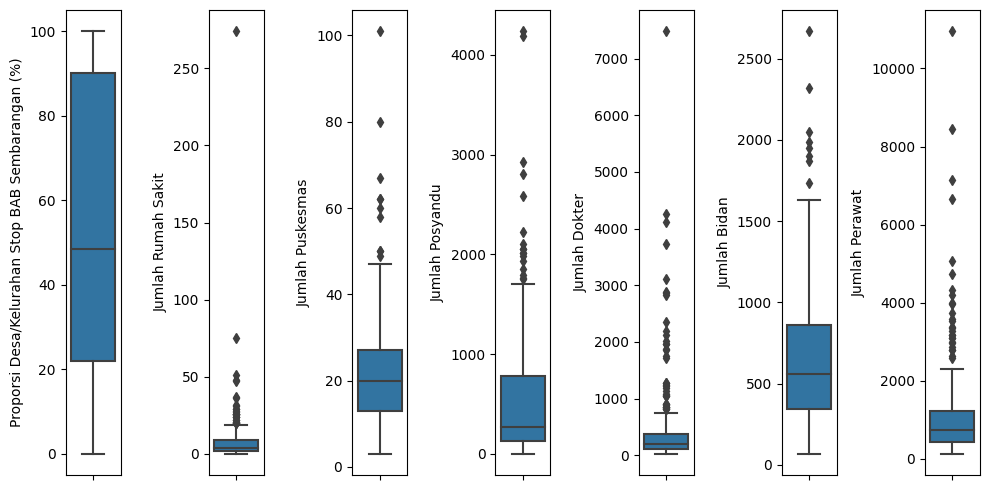

In [ ]:
#mendeteksi outliers
data_outliers = ['Proporsi Desa/Kelurahan Stop BAB Sembarangan (%)',
                 'Jumlah Rumah Sakit', 'Jumlah Puskesmas', 'Jumlah Posyandu', 'Jumlah Dokter', 'Jumlah Bidan', 'Jumlah Perawat']
plt.figure(figsize=(10,5))
for i in range(0,len(data_outliers)):
    plt.subplot(1,len(data_outliers),i+1)
    sns.boxplot(y=data[data_outliers[i]])
    plt.tight_layout()

In [ ]:
data_outliers = ['Jumlah Penduduk (jiwa)', 'Tingkat Kemiskinan (%)',
                 'Proporsi Keluarga yang Memiliki Akses Terhadap Fasilitas Sanitasi yang Layak (%)',
                 'Persentase Sarana Air Minum Memenuhi Syarat (%)','Proporsi Desa/Kelurahan Stop BAB Sembarangan (%)',
                 'Jumlah Rumah Sakit', 'Jumlah Puskesmas', 'Jumlah Posyandu', 'Jumlah Dokter', 'Jumlah Bidan', 'Jumlah Perawat']


In [ ]:
for i in range(len(data_outliers)):
    Q1 = np.quantile(data[data_outliers[i]], .25)
    Q3 = np.quantile(data[data_outliers[i]], .75)
    IQR = Q3 - Q1
    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR
    print("Mendeteksi Outliers pada kolom", color.BOLD+"{0}".format(data_outliers[i])+color.END)
    print("Batas min_IQR: ",min_IQR)
    print("Batas max_IQR: ",max_IQR)

    #memeriksa dataset yang menjadi outlier
    outmax=data.loc[data[data_outliers[i]] > max_IQR]
    outmin=data.loc[data[data_outliers[i]] < min_IQR]
    if len(outmax)!=0:
        display(outmax)
    if len(outmin)!=0:
        display(outmin)
    if len(outmax)==0 and len(outmin)==0:
        print("Tidak ada outliers!")
    print("")
    #print("Jumlah Data Outliers", len(data_outliers))

Mendeteksi Outliers pada kolom Jumlah Penduduk (jiwa)
Batas min_IQR:  -920408.25
Batas max_IQR:  2144523.75


,Provinsi,Kab/Kota,Prevalensi Balita Stunting (%),Kategori Prevalensi Stunting Berdasarkan WHO,Jumlah Penduduk (jiwa),Tingkat Kemiskinan (%),Proporsi Keluarga yang Memiliki Akses Terhadap Fasilitas Sanitasi yang Layak (%),Persentase Sarana Air Minum Memenuhi Syarat (%),Proporsi Desa/Kelurahan Stop BAB Sembarangan (%),Jumlah Rumah Sakit,Jumlah Puskesmas,Jumlah Posyandu,Jumlah Dokter,Jumlah Bidan,Jumlah Perawat
50,SUMUT,Kota Medan,19.9,Low,2460858,8.3,66.6,100.0,0.0,75,41,1285,3115,1989,6646
133,BANTEN,Kabupaten Tangerang,23.3,Medium,3245619,7.1,4.8,100.0,0.4,26,44,1180,2129,998,3590
138,JABAR,Kabupaten Bandung,31.1,High,3773706,7.2,90.3,74.6,74.7,10,62,4238,742,822,1952
140,JABAR,Kabupaten Bekasi,21.5,Medium,3922987,5.2,91.0,95.5,29.0,51,44,1752,3728,1628,3957
141,JABAR,Kabupaten Bogor,28.6,Medium,6067956,8.1,74.0,87.5,20.0,29,101,2585,1879,1952,3995
143,JABAR,Kabupaten Cianjur,33.7,High,2329635,11.2,93.0,100.0,84.0,5,47,2929,552,1117,952
144,JABAR,Kabupaten Cirebon,26.5,Medium,2206614,12.3,91.0,23.9,70.0,12,60,1791,858,1628,2969
145,JABAR,Kabupaten Garut,35.2,High,2644843,10.7,97.0,81.5,86.0,7,67,4194,416,1624,2870
147,JABAR,Kabupaten Karawang,20.6,Medium,2359078,9.0,44.0,39.1,85.0,25,50,1595,884,1502,3093
153,JABAR,Kabupaten Sukabumi,24.2,Medium,2526878,7.7,99.7,100.0,100.0,9,58,1650,623,1452,2156



Jumlah Data Outliers 11
Mendeteksi Outliers pada kolom Tingkat Kemiskinan (%)
Batas min_IQR:  -2.662499999999998
Batas max_IQR:  23.437499999999996


,Provinsi,Kab/Kota,Prevalensi Balita Stunting (%),Kategori Prevalensi Stunting Berdasarkan WHO,Jumlah Penduduk (jiwa),Tingkat Kemiskinan (%),Proporsi Keluarga yang Memiliki Akses Terhadap Fasilitas Sanitasi yang Layak (%),Persentase Sarana Air Minum Memenuhi Syarat (%),Proporsi Desa/Kelurahan Stop BAB Sembarangan (%),Jumlah Rumah Sakit,Jumlah Puskesmas,Jumlah Posyandu,Jumlah Dokter,Jumlah Bidan,Jumlah Perawat
35,SUMUT,Kabupaten Nias Barat,27.9,Medium,90585,26.4,86.9,100.0,1.9,1,13,0,24,297,270
37,SUMUT,Kabupaten Nias Utara,34.4,High,148790,25.7,29.9,71.4,12.4,1,11,132,35,379,301
82,RIAU,Kabupaten Kepulauan Meranti,23.3,Medium,189093,25.6,95.8,67.2,42.6,1,10,218,100,212,143
222,JATIM,Kabupaten Sampang,17.2,Low,1001140,23.8,100.0,100.0,100.0,3,22,574,155,819,690
252,NTB,Kabupaten Bima,30.4,High,50892,31.9,64.4,55.6,78.1,2,21,653,118,534,649
257,NTB,Kabupaten Lombok Utara,34.0,High,228813,27.0,99.2,68.4,48.8,1,8,366,92,280,438
260,NTB,Kota Bima,23.7,Medium,183790,41.1,96.2,45.5,43.9,4,7,144,93,223,386
262,NTT,Kabupaten Ende,27.2,Medium,270763,24.5,79.5,50.0,99.6,3,26,70,40,711,789
263,NTT,Kabupaten Rote Ndao,40.1,Very High,143764,36.0,82.3,53.2,27.7,1,12,24,50,324,277



Jumlah Data Outliers 11
Mendeteksi Outliers pada kolom Proporsi Keluarga yang Memiliki Akses Terhadap Fasilitas Sanitasi yang Layak (%)
Batas min_IQR:  52.21249999999999
Batas max_IQR:  127.31250000000001


,Provinsi,Kab/Kota,Prevalensi Balita Stunting (%),Kategori Prevalensi Stunting Berdasarkan WHO,Jumlah Penduduk (jiwa),Tingkat Kemiskinan (%),Proporsi Keluarga yang Memiliki Akses Terhadap Fasilitas Sanitasi yang Layak (%),Persentase Sarana Air Minum Memenuhi Syarat (%),Proporsi Desa/Kelurahan Stop BAB Sembarangan (%),Jumlah Rumah Sakit,Jumlah Puskesmas,Jumlah Posyandu,Jumlah Dokter,Jumlah Bidan,Jumlah Perawat
13,ACEH,Kabupaten Gayo Lues,42.9,Very High,96126,19.6,52.2,75.0,2.8,1,12,0,64,223,233
34,SUMUT,Kabupaten Nias,32.1,High,147794,16.8,31.9,71.4,25.3,1,12,98,104,419,444
36,SUMUT,Kabupaten Nias Selatan,36.7,High,366163,16.9,0.0,0.0,1.3,2,36,20,53,1009,990
37,SUMUT,Kabupaten Nias Utara,34.4,High,148790,25.7,29.9,71.4,12.4,1,11,132,35,379,301
49,SUMUT,Kota Gunung Sitoli,26.3,Medium,136707,16.5,42.8,50.0,1.0,1,8,66,66,389,199
53,SUMUT,Kota Sibolga,25.8,Medium,89932,12.3,45.7,97.9,5.9,3,5,47,156,257,351
92,KEP.RIAU,Kabupaten Kepulauan Anambas,21.7,Medium,47824,7.1,31.0,100.0,5.6,3,7,31,84,171,255
93,KEP.RIAU,Kabupaten Lingga,25.4,Medium,103969,13.9,48.5,77.2,17.1,2,13,86,72,248,267
130,BANTEN,Kabupaten Lebak,27.3,Medium,1386793,10.3,50.1,100.0,9.3,4,42,1222,354,1171,1075
132,BANTEN,Kabupaten Serang,27.2,Medium,1622630,5.5,4.8,94.0,11.7,4,31,930,337,925,1730



Jumlah Data Outliers 11
Mendeteksi Outliers pada kolom Persentase Sarana Air Minum Memenuhi Syarat (%)
Batas min_IQR:  10.725000000000016
Batas max_IQR:  141.325


,Provinsi,Kab/Kota,Prevalensi Balita Stunting (%),Kategori Prevalensi Stunting Berdasarkan WHO,Jumlah Penduduk (jiwa),Tingkat Kemiskinan (%),Proporsi Keluarga yang Memiliki Akses Terhadap Fasilitas Sanitasi yang Layak (%),Persentase Sarana Air Minum Memenuhi Syarat (%),Proporsi Desa/Kelurahan Stop BAB Sembarangan (%),Jumlah Rumah Sakit,Jumlah Puskesmas,Jumlah Posyandu,Jumlah Dokter,Jumlah Bidan,Jumlah Perawat
15,ACEH,Kabupaten Pidie,39.3,High,458330,19.6,69.0,2.2,9.0,5,26,413,273,2048,1762
20,ACEH,Kota Lhokseumawe,27.4,Medium,213107,11.2,89.1,0.0,17.6,10,7,91,232,758,955
23,SUMUT,Kabupaten Asahan,18.9,Low,777626,9.4,93.7,0.0,4.4,11,29,154,261,1004,648
30,SUMUT,Kabupaten Labuhanbatu Selatan,27.0,Medium,316798,8.5,88.0,0.0,20.6,3,17,157,110,616,336
36,SUMUT,Kabupaten Nias Selatan,36.7,High,366163,16.9,0.0,0.0,1.3,2,36,20,53,1009,990
38,SUMUT,Kabupaten Padang Lawas,42.0,Very High,263719,8.7,66.9,0.0,26.6,2,16,113,84,721,236
40,SUMUT,Kabupaten Pakpak Bharat,40.8,Very High,53315,9.4,70.0,0.0,86.5,1,8,91,48,137,187
44,SUMUT,Kabupaten Tapanuli Selatan,30.8,High,303685,8.8,74.6,0.0,7.3,1,16,492,71,350,175
45,SUMUT,Kabupaten Tapanuli Tengah,25.3,Medium,369300,12.7,80.3,0.0,0.9,1,25,4,127,866,514
46,SUMUT,Kabupaten Tapanuli Utara,26.7,Medium,315222,9.7,76.9,0.0,1.6,2,21,28,126,919,486



Jumlah Data Outliers 11
Mendeteksi Outliers pada kolom Proporsi Desa/Kelurahan Stop BAB Sembarangan (%)
Batas min_IQR:  -80.39999999999998
Batas max_IQR:  192.39999999999998
Tidak ada outliers!

Jumlah Data Outliers 11
Mendeteksi Outliers pada kolom Jumlah Rumah Sakit
Batas min_IQR:  -8.5
Batas max_IQR:  19.5


,Provinsi,Kab/Kota,Prevalensi Balita Stunting (%),Kategori Prevalensi Stunting Berdasarkan WHO,Jumlah Penduduk (jiwa),Tingkat Kemiskinan (%),Proporsi Keluarga yang Memiliki Akses Terhadap Fasilitas Sanitasi yang Layak (%),Persentase Sarana Air Minum Memenuhi Syarat (%),Proporsi Desa/Kelurahan Stop BAB Sembarangan (%),Jumlah Rumah Sakit,Jumlah Puskesmas,Jumlah Posyandu,Jumlah Dokter,Jumlah Bidan,Jumlah Perawat
26,SUMUT,Kabupaten Deli Serdang,12.5,Low,1941374,4.00,82.8,69.7,48.2,22,34,1471,905,1735,1782
50,SUMUT,Kota Medan,19.9,Low,2460858,8.30,66.6,100.0,0.0,75,41,1285,3115,1989,6646
59,SUMBAR,Kota Padang,18.9,Low,984490,4.94,100.0,91.1,100.0,26,23,642,1866,915,3342
75,SUMSEL,Kota Palembang,16.1,Low,1686073,11.30,97.1,94.8,34.6,36,41,642,2189,1529,4744
89,RIAU,Kota Pekanbaru,11.4,Low,1160343,2.80,98.9,82.8,38.6,31,21,481,1714,177,217
95,KEP.RIAU,Kota Batam,17.5,Low,1196396,5.10,95.2,83.9,21.9,20,21,338,1044,833,1998
128,LAMPUNG,Kota Bandar Lampung,19.4,Low,1184949,9.10,95.9,100.0,73.0,20,30,704,1181,1006,3095
133,BANTEN,Kabupaten Tangerang,23.3,Medium,3245619,7.10,4.8,100.0,0.4,26,44,1180,2129,998,3590
135,BANTEN,Kota Serang,23.4,Medium,692101,6.80,100.0,66.7,10.6,274,16,186,608,606,998
136,BANTEN,Kota Tangerang,15.3,Low,1895486,5.90,100.0,62.8,100.0,26,38,967,1961,961,2788



Jumlah Data Outliers 11
Mendeteksi Outliers pada kolom Jumlah Puskesmas
Batas min_IQR:  -8.0
Batas max_IQR:  48.0


,Provinsi,Kab/Kota,Prevalensi Balita Stunting (%),Kategori Prevalensi Stunting Berdasarkan WHO,Jumlah Penduduk (jiwa),Tingkat Kemiskinan (%),Proporsi Keluarga yang Memiliki Akses Terhadap Fasilitas Sanitasi yang Layak (%),Persentase Sarana Air Minum Memenuhi Syarat (%),Proporsi Desa/Kelurahan Stop BAB Sembarangan (%),Jumlah Rumah Sakit,Jumlah Puskesmas,Jumlah Posyandu,Jumlah Dokter,Jumlah Bidan,Jumlah Perawat
138,JABAR,Kabupaten Bandung,31.1,High,3773706,7.2,90.3,74.6,74.7,10,62,4238,742,822,1952
141,JABAR,Kabupaten Bogor,28.6,Medium,6067956,8.1,74.0,87.5,20.0,29,101,2585,1879,1952,3995
144,JABAR,Kabupaten Cirebon,26.5,Medium,2206614,12.3,91.0,23.9,70.0,12,60,1791,858,1628,2969
145,JABAR,Kabupaten Garut,35.2,High,2644843,10.7,97.0,81.5,86.0,7,67,4194,416,1624,2870
146,JABAR,Kabupaten Indramayu,14.4,Low,1755685,13.0,82.0,74.3,60.0,11,49,1985,401,988,1560
147,JABAR,Kabupaten Karawang,20.6,Medium,2359078,9.0,44.0,39.1,85.0,25,50,1595,884,1502,3093
153,JABAR,Kabupaten Sukabumi,24.2,Medium,2526878,7.7,99.7,100.0,100.0,9,58,1650,623,1452,2156
156,JABAR,Kota Bandung,26.4,Medium,2576050,4.4,78.5,96.4,61.6,37,80,1423,4121,1554,8457
206,JATIM,Kabupaten Jember,23.9,Medium,2471542,10.4,78.1,93.1,15.3,11,50,2803,1228,1411,2109
237,JATIM,Kota Surabaya,28.9,Medium,2918543,5.2,98.9,70.1,48.7,48,62,1760,7484,1900,10956



Jumlah Data Outliers 11
Mendeteksi Outliers pada kolom Jumlah Posyandu
Batas min_IQR:  -841.875
Batas max_IQR:  1749.125


,Provinsi,Kab/Kota,Prevalensi Balita Stunting (%),Kategori Prevalensi Stunting Berdasarkan WHO,Jumlah Penduduk (jiwa),Tingkat Kemiskinan (%),Proporsi Keluarga yang Memiliki Akses Terhadap Fasilitas Sanitasi yang Layak (%),Persentase Sarana Air Minum Memenuhi Syarat (%),Proporsi Desa/Kelurahan Stop BAB Sembarangan (%),Jumlah Rumah Sakit,Jumlah Puskesmas,Jumlah Posyandu,Jumlah Dokter,Jumlah Bidan,Jumlah Perawat
138,JABAR,Kabupaten Bandung,31.1,High,3773706,7.2,90.3,74.6,74.7,10,62,4238,742,822,1952
139,JABAR,Kabupaten Bandung Barat,29.6,Medium,1690441,11.3,100.0,88.2,100.0,9,32,1858,303,638,1047
140,JABAR,Kabupaten Bekasi,21.5,Medium,3922987,5.2,91.0,95.5,29.0,51,44,1752,3728,1628,3957
141,JABAR,Kabupaten Bogor,28.6,Medium,6067956,8.1,74.0,87.5,20.0,29,101,2585,1879,1952,3995
143,JABAR,Kabupaten Cianjur,33.7,High,2329635,11.2,93.0,100.0,84.0,5,47,2929,552,1117,952
144,JABAR,Kabupaten Cirebon,26.5,Medium,2206614,12.3,91.0,23.9,70.0,12,60,1791,858,1628,2969
145,JABAR,Kabupaten Garut,35.2,High,2644843,10.7,97.0,81.5,86.0,7,67,4194,416,1624,2870
146,JABAR,Kabupaten Indramayu,14.4,Low,1755685,13.0,82.0,74.3,60.0,11,49,1985,401,988,1560
166,JATENG,Kabupaten Banyumas,21.6,Medium,1789630,13.7,100.0,75.7,100.0,24,40,2056,846,1149,3175
176,JATENG,Kabupaten Kebumen,15.9,Low,1361913,17.8,93.4,89.8,96.7,11,35,2053,326,1025,1749



Jumlah Data Outliers 11
Mendeteksi Outliers pada kolom Jumlah Dokter
Batas min_IQR:  -293.125
Batas max_IQR:  763.875


,Provinsi,Kab/Kota,Prevalensi Balita Stunting (%),Kategori Prevalensi Stunting Berdasarkan WHO,Jumlah Penduduk (jiwa),Tingkat Kemiskinan (%),Proporsi Keluarga yang Memiliki Akses Terhadap Fasilitas Sanitasi yang Layak (%),Persentase Sarana Air Minum Memenuhi Syarat (%),Proporsi Desa/Kelurahan Stop BAB Sembarangan (%),Jumlah Rumah Sakit,Jumlah Puskesmas,Jumlah Posyandu,Jumlah Dokter,Jumlah Bidan,Jumlah Perawat
18,ACEH,Kota Banda Aceh,23.4,Medium,280231,7.60,100.0,96.9,100.0,13,11,63,1074,539,2140
26,SUMUT,Kabupaten Deli Serdang,12.5,Low,1941374,4.00,82.8,69.7,48.2,22,34,1471,905,1735,1782
50,SUMUT,Kota Medan,19.9,Low,2460858,8.30,66.6,100.0,0.0,75,41,1285,3115,1989,6646
59,SUMBAR,Kota Padang,18.9,Low,984490,4.94,100.0,91.1,100.0,26,23,642,1866,915,3342
75,SUMSEL,Kota Palembang,16.1,Low,1686073,11.30,97.1,94.8,34.6,36,41,642,2189,1529,4744
89,RIAU,Kota Pekanbaru,11.4,Low,1160343,2.80,98.9,82.8,38.6,31,21,481,1714,177,217
95,KEP.RIAU,Kota Batam,17.5,Low,1196396,5.10,95.2,83.9,21.9,20,21,338,1044,833,1998
128,LAMPUNG,Kota Bandar Lampung,19.4,Low,1184949,9.10,95.9,100.0,73.0,20,30,704,1181,1006,3095
133,BANTEN,Kabupaten Tangerang,23.3,Medium,3245619,7.10,4.8,100.0,0.4,26,44,1180,2129,998,3590
136,BANTEN,Kota Tangerang,15.3,Low,1895486,5.90,100.0,62.8,100.0,26,38,967,1961,961,2788



Jumlah Data Outliers 11
Mendeteksi Outliers pada kolom Jumlah Bidan
Batas min_IQR:  -424.75
Batas max_IQR:  1631.25


,Provinsi,Kab/Kota,Prevalensi Balita Stunting (%),Kategori Prevalensi Stunting Berdasarkan WHO,Jumlah Penduduk (jiwa),Tingkat Kemiskinan (%),Proporsi Keluarga yang Memiliki Akses Terhadap Fasilitas Sanitasi yang Layak (%),Persentase Sarana Air Minum Memenuhi Syarat (%),Proporsi Desa/Kelurahan Stop BAB Sembarangan (%),Jumlah Rumah Sakit,Jumlah Puskesmas,Jumlah Posyandu,Jumlah Dokter,Jumlah Bidan,Jumlah Perawat
10,ACEH,Kabupaten Aceh Utara,38.8,High,636641,17.4,81.5,18.5,5.2,2,32,969,238,2319,1568
12,ACEH,Kabupaten Bireuen,24.3,Medium,483716,13.3,86.6,62.5,17.7,6,20,166,311,1869,1304
15,ACEH,Kabupaten Pidie,39.3,High,458330,19.6,69.0,2.2,9.0,5,26,413,273,2048,1762
26,SUMUT,Kabupaten Deli Serdang,12.5,Low,1941374,4.0,82.8,69.7,48.2,22,34,1471,905,1735,1782
50,SUMUT,Kota Medan,19.9,Low,2460858,8.3,66.6,100.0,0.0,75,41,1285,3115,1989,6646
141,JABAR,Kabupaten Bogor,28.6,Medium,6067956,8.1,74.0,87.5,20.0,29,101,2585,1879,1952,3995
154,JABAR,Kabupaten Sumedang,22.0,Medium,1180550,10.7,95.8,79.0,81.2,3,35,1264,183,2670,1217
237,JATIM,Kota Surabaya,28.9,Medium,2918543,5.2,98.9,70.1,48.7,48,62,1760,7484,1900,10956



Jumlah Data Outliers 11
Mendeteksi Outliers pada kolom Jumlah Perawat
Batas min_IQR:  -797.75
Batas max_IQR:  2456.25


,Provinsi,Kab/Kota,Prevalensi Balita Stunting (%),Kategori Prevalensi Stunting Berdasarkan WHO,Jumlah Penduduk (jiwa),Tingkat Kemiskinan (%),Proporsi Keluarga yang Memiliki Akses Terhadap Fasilitas Sanitasi yang Layak (%),Persentase Sarana Air Minum Memenuhi Syarat (%),Proporsi Desa/Kelurahan Stop BAB Sembarangan (%),Jumlah Rumah Sakit,Jumlah Puskesmas,Jumlah Posyandu,Jumlah Dokter,Jumlah Bidan,Jumlah Perawat
50,SUMUT,Kota Medan,19.9,Low,2460858,8.30,66.6,100.0,0.0,75,41,1285,3115,1989,6646
59,SUMBAR,Kota Padang,18.9,Low,984490,4.94,100.0,91.1,100.0,26,23,642,1866,915,3342
75,SUMSEL,Kota Palembang,16.1,Low,1686073,11.30,97.1,94.8,34.6,36,41,642,2189,1529,4744
128,LAMPUNG,Kota Bandar Lampung,19.4,Low,1184949,9.10,95.9,100.0,73.0,20,30,704,1181,1006,3095
133,BANTEN,Kabupaten Tangerang,23.3,Medium,3245619,7.10,4.8,100.0,0.4,26,44,1180,2129,998,3590
136,BANTEN,Kota Tangerang,15.3,Low,1895486,5.90,100.0,62.8,100.0,26,38,967,1961,961,2788
137,BANTEN,Kota Tangerang Selatan,19.9,Low,1354350,2.60,97.7,81.0,16.1,24,29,427,2015,834,2629
140,JABAR,Kabupaten Bekasi,21.5,Medium,3922987,5.20,91.0,95.5,29.0,51,44,1752,3728,1628,3957
141,JABAR,Kabupaten Bogor,28.6,Medium,6067956,8.10,74.0,87.5,20.0,29,101,2585,1879,1952,3995
144,JABAR,Kabupaten Cirebon,26.5,Medium,2206614,12.30,91.0,23.9,70.0,12,60,1791,858,1628,2969



Jumlah Data Outliers 11


**ENCODING**

In [ ]:
#using sklearn label encoder
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data['Kategori Prevalensi Stunting Berdasarkan WHO'])
data['Kategori Prevalensi Stunting Berdasarkan WHO'] = le.transform(data['Kategori Prevalensi Stunting Berdasarkan WHO'])

In [ ]:
data['Kategori Prevalensi Stunting Berdasarkan WHO'].value_counts()

2    172
1     89
0     48
3      9
Name: Kategori Prevalensi Stunting Berdasarkan WHO, dtype: int64

In [ ]:
172/318

0.5408805031446541

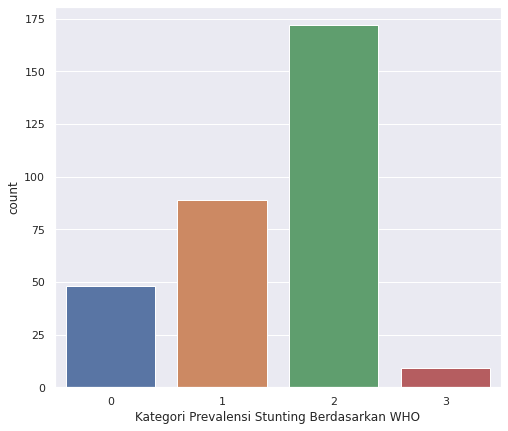

In [ ]:
plt.figure(figsize=(8,7))
sns.set(style='darkgrid')
p = sns.countplot(x='Kategori Prevalensi Stunting Berdasarkan WHO',  data = data)

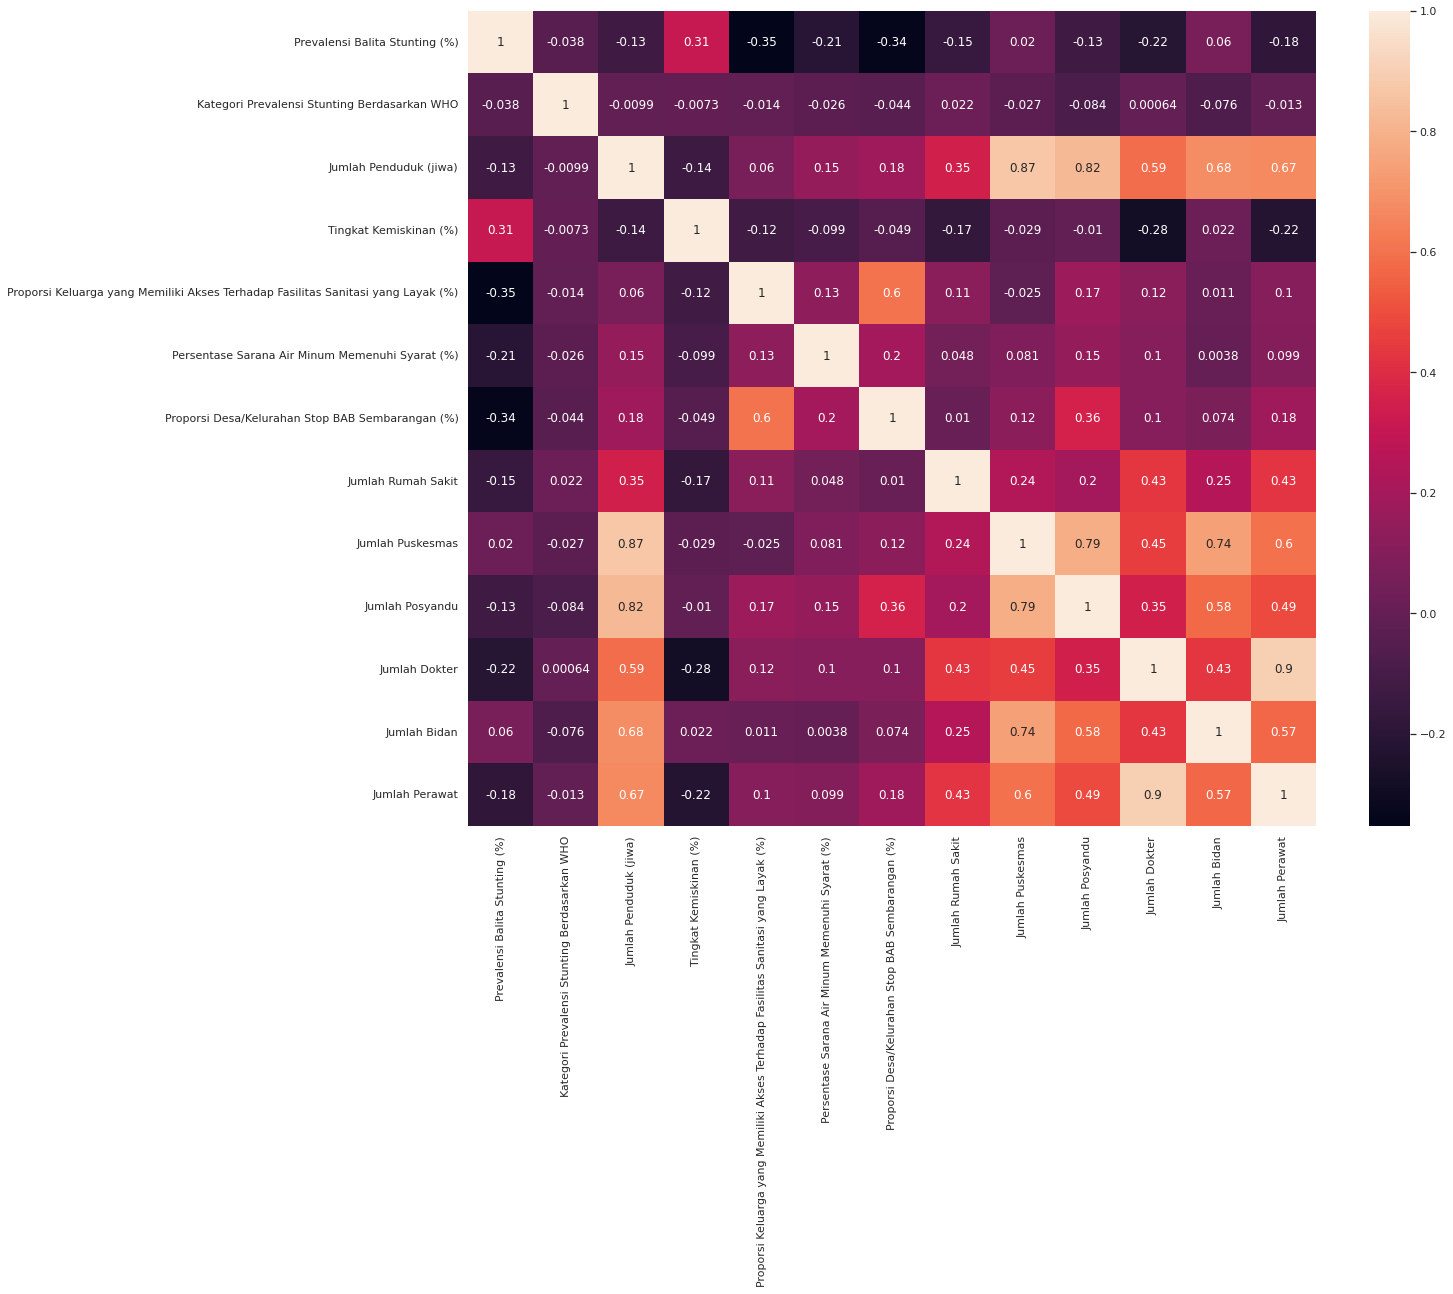

In [ ]:
f = plt.figure(figsize=(19, 15))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

**MEMBANDINGKAN**

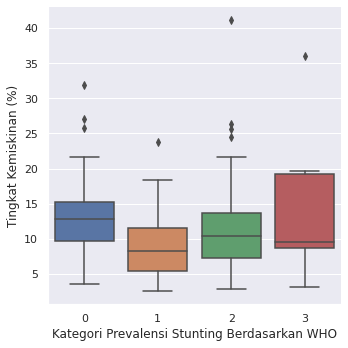

In [ ]:
p= sns.catplot(x="Kategori Prevalensi Stunting Berdasarkan WHO", y="Tingkat Kemiskinan (%)", kind="box",
                  data=data)

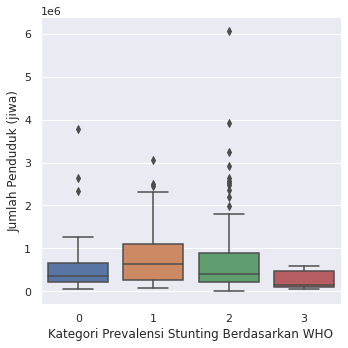

In [ ]:
p= sns.catplot(x="Kategori Prevalensi Stunting Berdasarkan WHO", y='Jumlah Penduduk (jiwa)', kind="box",
                  data=data)

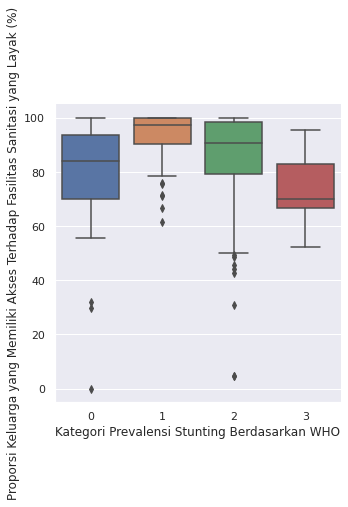

In [ ]:
p= sns.catplot(x="Kategori Prevalensi Stunting Berdasarkan WHO",
               y='Proporsi Keluarga yang Memiliki Akses Terhadap Fasilitas Sanitasi yang Layak (%)', kind='box', data=data)

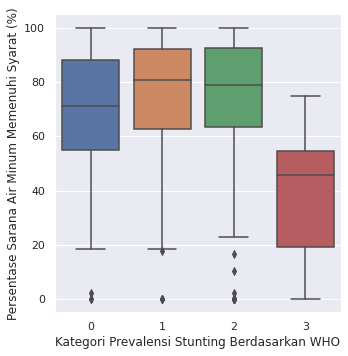

In [ ]:
p= sns.catplot(x="Kategori Prevalensi Stunting Berdasarkan WHO",
               y='Persentase Sarana Air Minum Memenuhi Syarat (%)', kind='box', data=data)

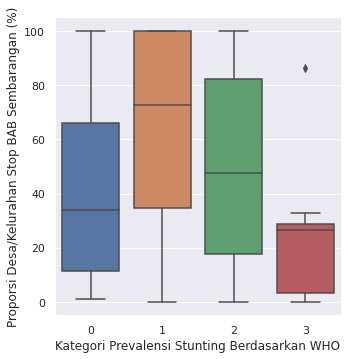

In [ ]:
p= sns.catplot(x="Kategori Prevalensi Stunting Berdasarkan WHO",
               y='Proporsi Desa/Kelurahan Stop BAB Sembarangan (%)', kind = 'box',data=data)

In [ ]:
data1 = data.drop(labels=135, axis=0)

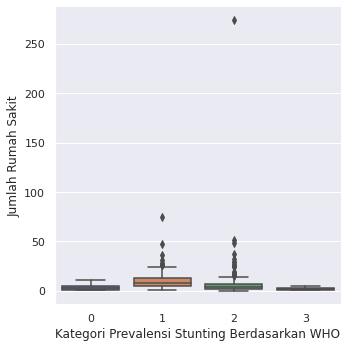

In [ ]:
#dengan banten
p= sns.catplot(x="Kategori Prevalensi Stunting Berdasarkan WHO",
               y='Jumlah Rumah Sakit', kind = 'box',data=data)

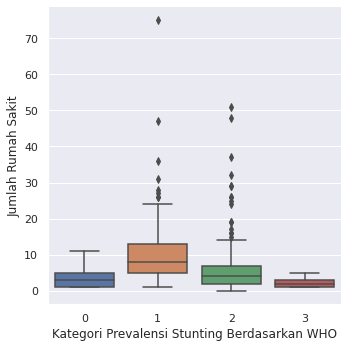

In [ ]:
#tanpa banten
p= sns.catplot(x="Kategori Prevalensi Stunting Berdasarkan WHO",
               y='Jumlah Rumah Sakit', kind = 'box',data=data1)

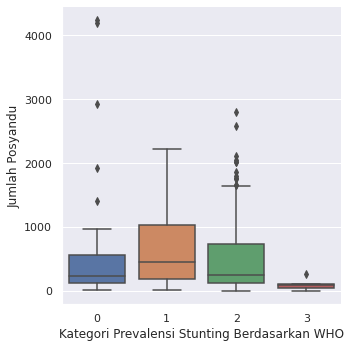

In [ ]:

p= sns.catplot(x="Kategori Prevalensi Stunting Berdasarkan WHO",
               y='Jumlah Posyandu', kind = 'box',data=data)

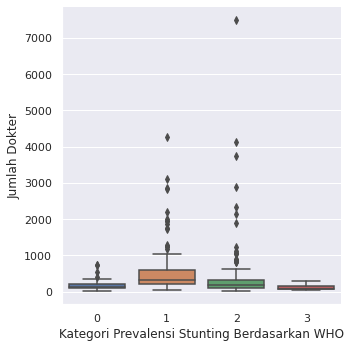

In [ ]:

p= sns.catplot(x="Kategori Prevalensi Stunting Berdasarkan WHO",
               y='Jumlah Dokter', kind = 'box',data=data)

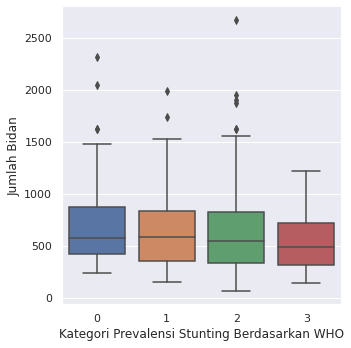

In [ ]:
p= sns.catplot(x="Kategori Prevalensi Stunting Berdasarkan WHO",
               y='Jumlah Bidan', kind = 'box',data=data)

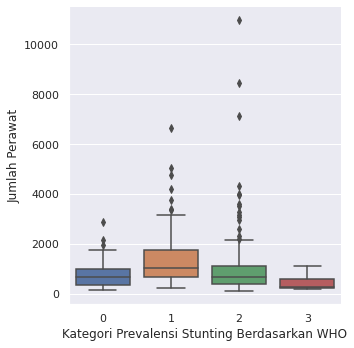

In [ ]:
p= sns.catplot(x="Kategori Prevalensi Stunting Berdasarkan WHO",
               y='Jumlah Perawat', kind = 'box',data=data)

1. Korelasi Negatif dari yang tertinggi sampai yang terendah
   - **Proporsi Keluarga yang Memiliki Akses Terhadap Fasilitas Sanitasi yang Layak (%)** dengan** Prevelansi Stunting** = -0.35
   - **Proporsi Desa/Kelurahan Stop BAB Sembarangan (%)** dengan **Prevelansi Stunting** = -0.34
   - **Jumlah Dokter** dengan **Tingkat Kemiskinan** = -0.28
   - **Jumlah Dokter** dengan **Prevelansi Stunting** = -0.22
   - **Jumlah Perawat** dengan **Tingkat Kemiskinan** = -0.22
   - **Persentase Sarana Air Minum Memenuhi Syarat (%)** dengan **Prevelansi Stunting** = -0.21


2. Korelasi Positif dari yang tertinggi sampai yang terendah
   - **Jumlah Dokter** dengan **Jumlah Perawat** = 0.9
   - **Jumlah Puskesmas** dengan **Jumlah Penduduk (jiwa)** = 0.87
   - **Jumlah Posyandu** dengan **Jumlah Penduduk (jiwa)** = 0.82
   - **Jumlah Puskesmas** dengan **Jumlah Puskesmas** = 0.79
   - **Jumlah Puskesmas** dengan **Jumlah Bidan** = 0.74
   - **Jumlah Bidan** dengan **Jumlah Penduduk (jiwa)** = 0.68
   - **Jumlah Perawat** dengan **Jumlah Penduduk (jiwa)** = 0.67
   - **Jumlah Puskesmas** dengan **Perawat** = 0.6
   - **Jumlah Bidan** dengan **Posyandu** = 0.58
   - **Jumlah Bidan** dengan **Perawat** = 0.57